<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(_0_4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_-0.4_n20.csv',
 'data_add_delta_-0.4_n30.csv',
 'data_add_delta_-0.4_n60.csv',
 'data_add_delta_-0.4_n120.csv',
 'data_add_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,94.913559,80.446465,50.173758,90.218927,0.159765,325.912475,325.643127,0.269347
1,0.0,1.0,65.602973,55.052587,59.832815,32.073000,-0.288149,222.273226,222.375911,-0.102685
2,0.0,2.0,29.762440,59.760142,27.892403,87.377666,-0.023262,214.769390,214.756738,0.012652
3,0.0,3.0,69.272382,89.610372,30.136375,54.223092,-0.046303,253.195919,253.061423,0.134496
4,0.0,4.0,80.457512,74.524299,71.995804,98.603054,-0.400546,335.180123,335.551228,-0.371105
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,47.035006,60.381895,95.535437,52.756386,0.196776,265.905500,265.824381,0.081119
119996,999.0,116.0,39.927223,97.599314,27.187312,27.471005,0.113176,202.298031,202.233403,0.064627
119997,999.0,117.0,74.564537,35.530876,59.240308,84.890523,-0.092350,264.133894,264.364963,-0.231069
119998,999.0,118.0,40.693720,44.953411,39.225313,56.132770,-0.430801,190.574413,191.067572,-0.493158


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,94.913559,80.446465,50.173758,90.218927,0.159765,325.912475,325.643127,0.269347
1,0.0,1.0,65.602973,55.052587,59.832815,32.073000,-0.288149,222.273226,222.375911,-0.102685
2,0.0,2.0,29.762440,59.760142,27.892403,87.377666,-0.023262,214.769390,214.756738,0.012652
3,0.0,3.0,69.272382,89.610372,30.136375,54.223092,-0.046303,253.195919,253.061423,0.134496
4,0.0,4.0,80.457512,74.524299,71.995804,98.603054,-0.400546,335.180123,335.551228,-0.371105
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,47.035006,60.381895,95.535437,52.756386,0.196776,265.905500,265.824381,0.081119
119996,999.0,116.0,39.927223,97.599314,27.187312,27.471005,0.113176,202.298031,202.233403,0.064627
119997,999.0,117.0,74.564537,35.530876,59.240308,84.890523,-0.092350,264.133894,264.364963,-0.231069
119998,999.0,118.0,40.693720,44.953411,39.225313,56.132770,-0.430801,190.574413,191.067572,-0.493158


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    94.913559  80.446465  50.173758  90.218927  0.159765  325.912475   
      1.0    65.602973  55.052587  59.832815  32.073000 -0.288149  222.273226   
      2.0    29.762440  59.760142  27.892403  87.377666 -0.023262  214.769390   
      3.0    69.272382  89.610372  30.136375  54.223092 -0.046303  253.195919   
      4.0    80.457512  74.524299  71.995804  98.603054 -0.400546  335.180123   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  47.035006  60.381895  95.535437  52.756386  0.196776  265.905500   
      116.0  39.927223  97.599314  27.187312  27.471005  0.113176  202.298031   
      117.0  74.564537  35.530876  59.240308  84.890523 -0.092350  264.133894   
      118.0  40.693720  44.953411  39.225313  56.132770 -0.430801  190.574413   
      119.0  98.715803  27.780015  40.003229  92.238912  0.020434  268.758392   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    325.643127  0.269347  
      1.0    222.375911 -0.102685  
      2.0    214.756738  0.012652  
      3.0    253.061423  0.134496  
      4.0    335.551228 -0.371105  
...                 ...       ...  
999.0 115.0  265.824381  0.081119  
      116.0  202.233403  0.064627  
      117.0  264.364963 -0.231069  
      118.0  191.067572 -0.493158  
      119.0  268.918697 -0.160306  

[120000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    94.913559  80.446465  50.173758  90.218927  0.159765  325.912475   
      1.0    65.602973  55.052587  59.832815  32.073000 -0.288149  222.273226   
      2.0    29.762440  59.760142  27.892403  87.377666 -0.023262  214.769390   
      3.0    69.272382  89.610372  30.136375  54.223092 -0.046303  253.195919   
      4.0    80.457512  74.524299  71.995804  98.603054 -0.400546  335.180123   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  47.035006  60.381895  95.535437  52.756386  0.196776  265.905500   
      116.0  39.927223  97.599314  27.187312  27.471005  0.113176  202.298031   
      117.0  74.564537  35.530876  59.240308  84.890523 -0.092350  264.133894   
      118.0  40.693720  44.953411  39.225313  56.132770 -0.430801  190.574413   
      119.0  98.715803  27.780015  40.003229  92.238912  0.020434  268.758392   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    325.643127  0.269347  
      1.0    222.375911 -0.102685  
      2.0    214.756738  0.012652  
      3.0    253.061423  0.134496  
      4.0    335.551228 -0.371105  
...                 ...       ...  
999.0 115.0  265.824381  0.081119  
      116.0  202.233403  0.064627  
      117.0  264.364963 -0.231069  
      118.0  191.067572 -0.493158  
      119.0  268.918697 -0.160306  

[120000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,94.913559,80.446465,50.173758,90.218927,0.159765,325.912475,325.643127,0.269347
1,0.0,1.0,65.602973,55.052587,59.832815,32.073000,-0.288149,222.273226,222.375911,-0.102685
2,0.0,2.0,29.762440,59.760142,27.892403,87.377666,-0.023262,214.769390,214.756738,0.012652
3,0.0,3.0,69.272382,89.610372,30.136375,54.223092,-0.046303,253.195919,253.061423,0.134496
4,0.0,4.0,80.457512,74.524299,71.995804,98.603054,-0.400546,335.180123,335.551228,-0.371105
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,47.035006,60.381895,95.535437,52.756386,0.196776,265.905500,265.824381,0.081119
119996,999.0,116.0,39.927223,97.599314,27.187312,27.471005,0.113176,202.298031,202.233403,0.064627
119997,999.0,117.0,74.564537,35.530876,59.240308,84.890523,-0.092350,264.133894,264.364963,-0.231069
119998,999.0,118.0,40.693720,44.953411,39.225313,56.132770,-0.430801,190.574413,191.067572,-0.493158


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    94.913559  80.446465  50.173758  90.218927  0.159765  325.912475   
      1.0    65.602973  55.052587  59.832815  32.073000 -0.288149  222.273226   
      2.0    29.762440  59.760142  27.892403  87.377666 -0.023262  214.769390   
      3.0    69.272382  89.610372  30.136375  54.223092 -0.046303  253.195919   
      4.0    80.457512  74.524299  71.995804  98.603054 -0.400546  335.180123   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  47.035006  60.381895  95.535437  52.756386  0.196776  265.905500   
      116.0  39.927223  97.599314  27.187312  27.471005  0.113176  202.298031   
      117.0  74.564537  35.530876  59.240308  84.890523 -0.092350  264.133894   
      118.0  40.693720  44.953411  39.225313  56.132770 -0.430801  190.574413   
      119.0  98.715803  27.780015  40.003229  92.238912  0.020434  268.758392   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    325.643127  0.269347  
      1.0    222.375911 -0.102685  
      2.0    214.756738  0.012652  
      3.0    253.061423  0.134496  
      4.0    335.551228 -0.371105  
...                 ...       ...  
999.0 115.0  265.824381  0.081119  
      116.0  202.233403  0.064627  
      117.0  264.364963 -0.231069  
      118.0  191.067572 -0.493158  
      119.0  268.918697 -0.160306  

[120000 rows x 8 columns]

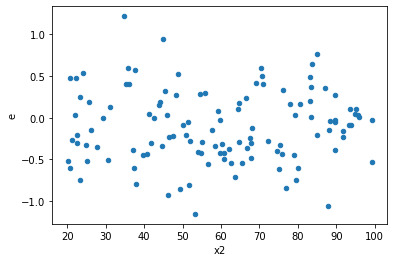

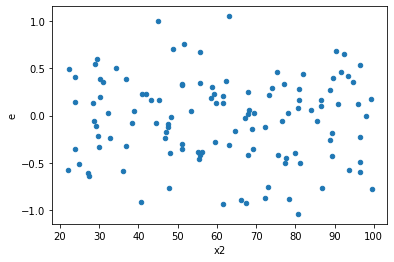

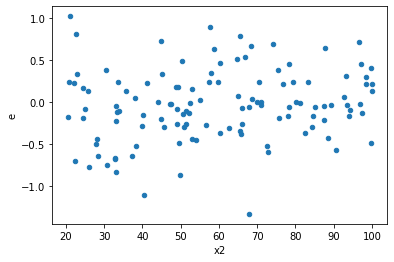

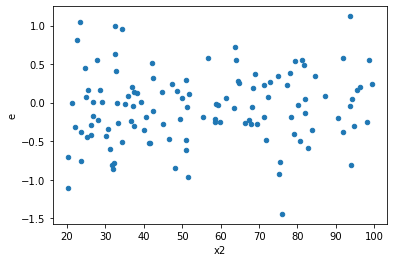

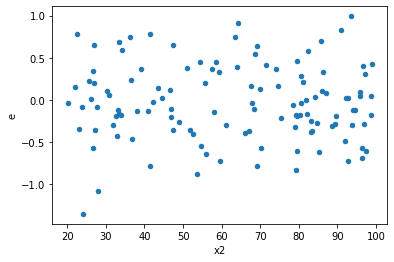

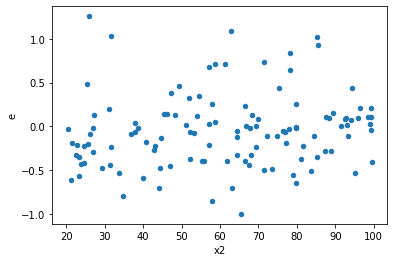

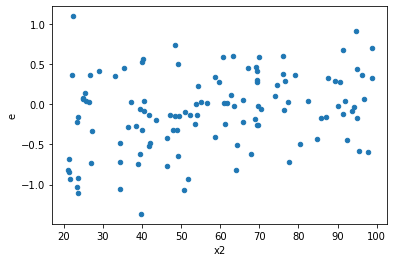

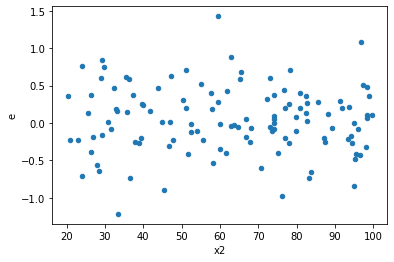

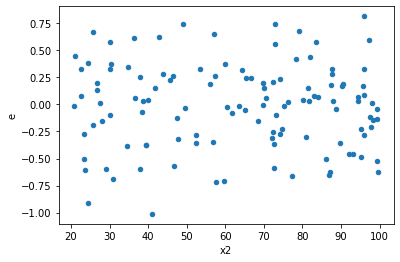

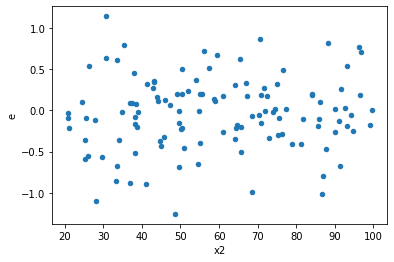

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,44.0,44.0,9.579201699767228,11.516941643902411,0.21770912954016428,0.2617486737250548,1.2022861617145266,0.5437732451685742,0.7281133774157129,0.2718866225842871,Reject005=1 : Homoscedasticity
4.0,44.0,44.0,7.310998047439373,8.454219622127443,0.16615904653271302,0.19214135504835098,1.1563701107933513,0.6319957626298978,0.6840021186850511,0.3159978813149489,Reject005=1 : Homoscedasticity
7.0,44.0,44.0,7.005909815393201,10.182756446323966,0.1592252230771182,0.23142628287099923,1.4534524015639882,0.21882667295200786,0.8905866635239961,0.10941333647600393,Reject005=1 : Homoscedasticity
9.0,44.0,44.0,8.27520986189301,9.28264781267533,0.18807295140665933,0.21096926846989386,1.1217416799810151,0.7048659171314511,0.6475670414342745,0.35243295856572554,Reject005=1 : Homoscedasticity
10.0,44.0,44.0,7.246394135056051,10.238834340980333,0.16469077579672844,0.23270078047682574,1.412955761189925,0.25545248361884054,0.8722737581905797,0.12772624180942027,Reject005=1 : Homoscedasticity
11.0,44.0,44.0,10.362263111648863,11.780551156132516,0.23550597981020144,0.2677397990030117,1.1368704914363028,0.6723682481479887,0.6638158759260057,0.33618412407399434,Reject005=1 : Homoscedasticity
12.0,44.0,44.0,7.459566837540938,8.56497458182832,0.1695356099441122,0.1946585132233709,1.1481865862136016,0.6487298393632233,0.6756350803183884,0.32436491968161163,Reject005=1 : Homoscedasticity
18.0,44.0,44.0,8.51420045370406,9.062178355688815,0.19350455576600137,0.2059585989929276,1.0643604651974525,0.8370385422962234,0.5814807288518883,0.4185192711481117,Reject005=1 : Homoscedasticity
27.0,44.0,44.0,7.803629759959303,9.203130022000673,0.1773552218172569,0.20916204595456075,1.1793396541212466,0.5866567430841361,0.706671628457932,0.29332837154206803,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,44.0,44.0,7.642170112675801,4.418656673769696,0.17368568437899548,0.10042401531294765,0.5781939695951841,0.07254875247479385,Reject005=1 : Homoscedasticity
1.0,44.0,44.0,9.054735149785756,7.284270391566286,0.20578943522240356,0.16555159980832468,0.8044708399603094,0.47349120558135066,Reject005=1 : Homoscedasticity
2.0,44.0,44.0,8.174084308455647,6.214494875938327,0.185774643373992,0.14123851990768926,0.7602680179735569,0.36679973192244375,Reject005=1 : Homoscedasticity
3.0,44.0,44.0,9.579201699767228,11.516941643902411,0.21770912954016428,0.2617486737250548,1.2022861617145266,0.5437732451685742,Reject005=1 : Homoscedasticity
4.0,44.0,44.0,7.310998047439373,8.454219622127443,0.16615904653271302,0.19214135504835098,1.1563701107933513,0.6319957626298978,Reject005=1 : Homoscedasticity
5.0,44.0,44.0,7.868076778711176,7.565910372717255,0.17881992678889036,0.1719525084708467,0.9615959001809058,0.8972450049731819,Reject005=1 : Homoscedasticity
6.0,44.0,44.0,8.468862941116393,8.10727261757826,0.19247415775264531,0.18425619585405137,0.9573035570356665,0.8855837637917456,Reject005=1 : Homoscedasticity
7.0,44.0,44.0,7.005909815393201,10.182756446323966,0.1592252230771182,0.23142628287099923,1.4534524015639882,0.21882667295200786,Reject005=1 : Homoscedasticity
8.0,44.0,44.0,6.51993186164488,6.182766146402674,0.14818026958283817,0.1405174124182426,0.9482869265512318,0.8610020348758377,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      908
Reject005=0 : Heteroscedasticity     92
Name: Result_test, dtype: int64